In [1]:
import psycopg
#import matplotlib as mp
import pandas as pd
import datetime as dt

# connect to psql database
conn = psycopg.connect(host="localhost", dbname="trader", user
                        ="jeffrey", password="strawberries")
cur = conn.cursor()

today = dt.datetime.today()                 # datetime.datetime object
yesterday = today - dt.timedelta(days=1)    # datetime.datetime object
data_date = today                           # datetime.datetime object


In [2]:
# EXPERIMENTI
#print(type(data_date))
#print(type(today))
#print(type(yesterday))

#now_time = dt.datetime.now()
#print(type(now_time))
#now_time.time()

#type(data_date.time())

data_date_day = data_date.date().strftime('%Y-%m-%d')
data_date_time = data_date.time().strftime('%H:%M:%S.%f')   
print(data_date_day)
print(data_date_time)
constructed_date = dt.datetime(2024, 12, 20)

2025-02-05
21:58:46.607919


In [3]:
# find all days with "price" data in tick_price table
cur.execute("SELECT DISTINCT recv_time::date FROM tick_price;")
distinct_dates = cur.fetchall()
num_distinct_dates = len(distinct_dates)
#print(distinct_dates[num_distinct_dates-1][0].strftime('%Y-%m-%d'))

date_strings = []
for date_ in distinct_dates:
    #date_strings = [date_.date().strftime('%Y-%m-%d')]
    #print(date_[0].strftime('%Y-%m-%d'))
    date_strings.append(date_[0].strftime('%Y-%m-%d'))

In [4]:
distinct_dates_no_tuples = [item for tup in distinct_dates for item in tup]


In [5]:
# for all the days with "price" data in tick_price table, find all the unique reqids in reqid_List table
#    There may be days with data, but no reqids for that day
#        For example - on days where the script was not shutdown from the previous day, the reqids from
#        the previous day will still be active and getting data for the following day (today)
#    for now ignore those days (it's just a few)
day_time_reqids = {}
for date_ in distinct_dates:
    cur.execute("SELECT DISTINCT reqid FROM reqid_List WHERE send_time::date = %s;", date_)
    reqids_ = cur.fetchall()
    day_time_reqids[date_] = reqids_

In [6]:
keys_ = day_time_reqids.keys()
keys_list_ = list(keys_)

key_ = keys_list_[147]
#day_time_reqids[distinct_dates[147]]
day_time_reqids[key_]   

[(103,),
 (502,),
 (1302,),
 (1402,),
 (902,),
 (602,),
 (302,),
 (1002,),
 (1102,),
 (202,),
 (402,),
 (1202,),
 (802,),
 (702,),
 (1502,),
 (1602,)]

In [7]:

selected_date = dt.datetime(2024, 12, 20)

In [8]:
# This prints out the key-value pairs
for date_, reqids_ in day_time_reqids.items():
    print(date_, reqids_)

(datetime.date(2024, 6, 26),) [(103,), (502,), (902,), (602,), (302,), (1002,), (1102,), (202,), (402,), (1202,), (802,), (702,)]
(datetime.date(2024, 11, 13),) [(103,), (502,), (1302,), (1402,), (902,), (602,), (302,), (1002,), (1102,), (202,), (402,), (1202,), (802,), (702,), (1502,), (1602,)]
(datetime.date(2024, 7, 29),) [(103,), (502,), (1302,), (1402,), (902,), (602,), (302,), (1002,), (1102,), (202,), (402,), (1202,), (802,), (702,)]
(datetime.date(2024, 9, 5),) [(103,), (502,), (1302,), (1402,), (902,), (602,), (302,), (1002,), (1102,), (202,), (402,), (1202,), (802,), (702,)]
(datetime.date(2025, 1, 15),) [(103,), (502,), (1302,), (1402,), (902,), (1802,), (602,), (302,), (1702,), (1002,), (1102,), (202,), (402,), (1202,), (802,), (702,), (1502,), (1602,)]
(datetime.date(2024, 6, 11),) [(103,), (502,), (902,), (602,), (302,), (1002,), (1102,), (202,), (402,), (802,), (702,)]
(datetime.date(2024, 6, 18),) [(103,), (502,), (902,), (602,), (302,), (1002,), (1102,), (202,), (402,)

In [9]:
# the last [0] reference here gets the value from the tuple.  the list(...)[x] return is a tuple
selected_date = list(day_time_reqids.keys())[2]
print(selected_date)

(datetime.date(2024, 7, 29),)


In [10]:
# keeping everything as a tuple here
day_time_reqids[selected_date]

[(103,),
 (502,),
 (1302,),
 (1402,),
 (902,),
 (602,),
 (302,),
 (1002,),
 (1102,),
 (202,),
 (402,),
 (1202,),
 (802,),
 (702,)]

In [11]:
selected_day_reqids = []
for reqid_ in day_time_reqids[selected_date]:
    print(reqid_[0])
    selected_day_reqids.append(reqid_)
selected_day_reqids.sort()
print(selected_day_reqids)

103
502
1302
1402
902
602
302
1002
1102
202
402
1202
802
702
[(103,), (202,), (302,), (402,), (502,), (602,), (702,), (802,), (902,), (1002,), (1102,), (1202,), (1302,), (1402,)]


In [12]:
selected_reqid_ = selected_day_reqids[0][0]
selected_day_ = selected_date[0]
name_ = "LAST"

cur.execute(""" SELECT recv_time, price FROM tick_price WHERE reqid = %s AND recv_time::date = %s AND name = %s;""", (selected_reqid_, selected_day_, name_))
data = cur.fetchall()


In [13]:
# Convert data to a pandas DataFrame
data_df = pd.DataFrame(data, columns=['recv_time', 'price'])
print(data_df.head())

                         recv_time    price
0 2024-07-29 14:38:49.544790-05:00  5474.23
1 2024-07-29 14:38:50.245552-05:00  5474.23
2 2024-07-29 14:38:50.257008-05:00  5474.19
3 2024-07-29 14:38:51.285602-05:00  5474.19
4 2024-07-29 14:38:51.285618-05:00  5474.21


In [14]:
data_df.sort_values(by='recv_time', inplace=True)

In [15]:
#data_df.plot(x='recv_time', y='price', kind='line')
#print(data_df.dtypes)

#data_df.iat[0, 0].time()
type(data_df.iat[0, 1])


decimal.Decimal

In [16]:
data_df['price'] = data_df['price'].astype(float)
print(data_df.dtypes)

recv_time    datetime64[ns, America/Chicago]
price                                float64
dtype: object


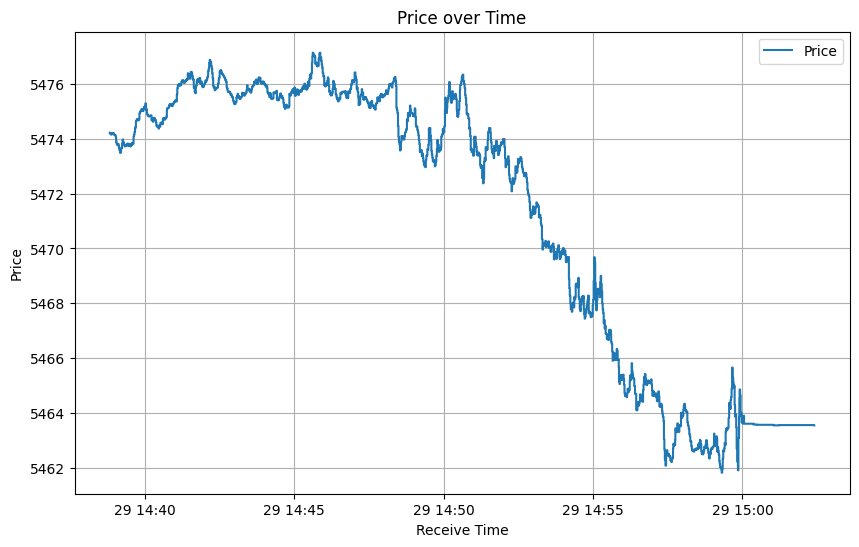

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_df['recv_time'], data_df['price'], label='Price')
plt.xlabel('Receive Time')
plt.ylabel('Price')
plt.title('Price over Time')
plt.legend()
plt.grid(True)
plt.show()